# Пример использования EarlyStopping Callback для остановки обучения нейросети при переобучении

Документация по [EarlyStopping Callback](https://keras.io/callbacks/#earlystopping) на сайте Keras.

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline 

C:\Users\sozyk\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Загружаем данные MNIST

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Преобразуем данные в нужный формат

In [3]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [5]:
Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)

# Создаем нейронную сеть

In [6]:
model = Sequential()

In [7]:
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

Компилируем сеть

In [8]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

## Создаем EarlyStopping Callback 

In [9]:
early_stopping_callback = EarlyStopping(monitor='val_acc', patience=2)

## Запускаем обучение нейронной сети

In [10]:
history = model.fit(X_train, Y_train, batch_size=200, epochs=25, validation_split=0.2, verbose=2, 
                    callbacks=[early_stopping_callback])

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
 - 6s - loss: 0.3135 - acc: 0.9122 - val_loss: 0.1637 - val_acc: 0.9538
Epoch 2/25
 - 1s - loss: 0.1272 - acc: 0.9636 - val_loss: 0.1108 - val_acc: 0.9690
Epoch 3/25
 - 1s - loss: 0.0841 - acc: 0.9758 - val_loss: 0.0916 - val_acc: 0.9734
Epoch 4/25
 - 1s - loss: 0.0585 - acc: 0.9832 - val_loss: 0.0876 - val_acc: 0.9725
Epoch 5/25
 - 1s - loss: 0.0429 - acc: 0.9877 - val_loss: 0.0832 - val_acc: 0.9743
Epoch 6/25
 - 1s - loss: 0.0315 - acc: 0.9916 - val_loss: 0.0725 - val_acc: 0.9778
Epoch 7/25
 - 1s - loss: 0.0235 - acc: 0.9945 - val_loss: 0.0723 - val_acc: 0.9778
Epoch 8/25
 - 1s - loss: 0.0173 - acc: 0.9961 - val_loss: 0.0670 - val_acc: 0.9793
Epoch 9/25
 - 1s - loss: 0.0129 - acc: 0.9974 - val_loss: 0.0728 - val_acc: 0.9783
Epoch 10/25
 - 1s - loss: 0.0093 - acc: 0.9986 - val_loss: 0.0715 - val_acc: 0.9789


In [11]:
print("Обучение остановлено на эпохе", early_stopping_callback.stopped_epoch)

Обучение остановлено на эпохе 9


## Визуализируем историю обучения сети

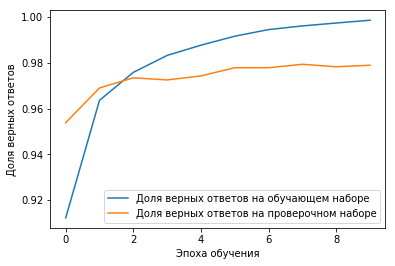

In [14]:
plt.plot(history.history['acc'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()